# Using Convolutional Neural Network to classify pictures of pathology of colorectal cancer

* This code can be run well offline. 

In [3]:
print(tf.__version__)

2.2.0


In [4]:
print(tf.keras.__version__)

2.3.0-tf


## Goal: 
* To build a my own CNN (Convolutional Neural Network) to classify two kinds of colorectal cancer in case it can help clinical practitioners to classify the two kinds of colorectal cancer more accurately. 
please read the [outline](https://github.com/Daniel-355/R_deep_learning_image/blob/master/My_project.md) to know more detail 

## Data sources  
These pictures have been labeled by pathologists at the University Hospitals Coventry and Warwickshire [link](https://warwick.ac.uk/fac/sci/dcs/research/tia/glascontest/download/), which included two classifications: benign (74) and malignant (91). All 165 pictures were split into two datasets: training dataset (85) and test dataset (80). 
The composition of the dataset is as follows.  
   
     
Split	|Warwick-QU
----|----
Training	| benign : 37
||malignant : 48
Test	|benign : 37
||malignant : 43  

Tabel of classification of colorectal cancer  
![Tabel of classification of colorectal cancer](https://github.com/Daniel-355/R_deep_learning_image/blob/master/Picture1.png?raw=true)  
 
Sample of picture  
![Sample of picture](https://github.com/Daniel-355/R_deep_learning_image/blob/master/Picture2.png?raw=true )  

## Data processing
Use the "convert" function to transform all pictures to "tensorflow" data automatically.

### Load general use libraries

In [2]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Dropout, Flatten
from tensorflow.keras.layers import  MaxPooling2D, ReLU
from tensorflow.keras.models import Sequential
#
from tensorflow.python.keras.layers.noise import GaussianNoise
# layer = GaussianNoise(0.2)
np.set_printoptions(threshold=np.inf)
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import initializers 

Using TensorFlow backend.


### Load datasets

In [5]:
# set directary
# did not split traning dataset and test dataset here
path1="C:/Users/hed2/Downloads/MOOCTF/class4/class4/FASHION_FC/"

train_path = path1 + 'fashion_image_label/fashion_train_jpg_60000/' # pictures directory
train_txt = path1 +'fashion_image_label/fashion_train_jpg_60000.txt' # pictures corresponded labels
x_train_savepath = path1 +'fashion_image_label/fashion_x_train.npy' # data features path
y_train_savepath = path1 +'fashion_image_label/fahion_y_train.npy' # data label paht

# define a function named "generateds" to read pictures into "tf" data one by one
def generateds(path, txt):
    f = open(txt, 'r')
    contents = f.readlines()  
    f.close()
    x, y_ = [], []
    for content in contents:
        value = content.split()   
        img_path = path + value[0]
        img = Image.open(img_path)
        img = img.resize((500, 350))
        img = np.array(img.convert('RGB'))
#         convert pictures to RGB with 3 levels
        img = img / 255.
        x.append(img)
        y_.append(value[1])
        print('loading : ' + content)
    x = np.array(x)
    y_ = np.array(y_)
    y_ = y_.astype(np.int64)
    return x, y_


if os.path.exists(x_train_savepath) and os.path.exists(y_train_savepath):
    print('-------------Load Datasets-----------------')
    x_train_save = np.load(x_train_savepath, allow_pickle = True)
    y_train = np.load(y_train_savepath, allow_pickle = True)
    x_train = np.reshape(x_train_save, (len(x_train_save), 350, 500, 3))
 
    # save transformed data as training data and test data
else:
    print('-------------Generate Datasets-----------------')
    x_train, y_train = generateds(train_path, train_txt)
   
    print('-------------Save Datasets-----------------')
    x_train_save = np.reshape(x_train, (len(x_train), -1))
 
    np.save(x_train_savepath, x_train_save)
    np.save(y_train_savepath, y_train)


-------------Load Datasets-----------------


### Split all data into the training dataset and the test dataset

In [6]:
x_data = x_train
y_data = y_train

np.random.seed(123)  #  shuffle data
np.random.shuffle(x_data)
np.random.seed(123)
np.random.shuffle(y_data)
tf.random.set_seed(123)

#  define x_train, y_train, x_test and y_test
x_train = x_data[:-30]
y_train = y_data[:-30]
x_test = x_data[-30:]
y_test = y_data[-30:]

In [7]:
np.shape(x_train)

(135, 350, 500, 3)

In [8]:
np.shape(y_train)

(135,)

In [9]:
np.shape(x_test)

(30, 350, 500, 3)

In [10]:
np.shape(y_test)

(30,)

### Data augmenation
* Only for x_train

In [11]:
image_gen_train = ImageDataGenerator(
    # rescale=1. / 1.,   
    rotation_range=15,   
    width_shift_range=.15,   
    height_shift_range=.15,   
    horizontal_flip=True,  
    vertical_flip=True,   
    zoom_range=0.8   
)
image_gen_train.fit(x_train)

## Training model

### ModelCheckpoint

In [12]:
# checkpoint: store the traing weight values
checkpoint_save_path = "C:/Users/hed2/Downloads/MOOCTF/class4/class4/FASHION_FC/fashion_image_label/fashion2.h5"
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path, save_best_only=True, save_weights_only=False)


### Build CNN structure

In [13]:
# ref: Radiomics - 1p19q Chromosome Status Classification
def simpleCNN():
    model = Sequential()
    model.add(Conv2D(16, (3, 3), activation='linear', kernel_initializer='he_uniform', input_shape=(350, 500, 3)))
    model.add(BatchNormalization())
    model.add(ReLU())  # add an advanced activation
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(32, (3, 3), activation='linear', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(ReLU())  # add an advanced activation
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3), activation='linear', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(ReLU())  # add an advanced activation
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (3, 3), activation='linear', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(ReLU())  # add an advanced activation
    model.add(MaxPooling2D(pool_size=(5, 5)))

    model.add(GaussianNoise(0.2))
    model.add(Flatten())

    model.add(Dense(128))
    model.add(ReLU())  # add an advanced activation

    model.add(Dropout(0.25))  # Avoid over-fitting
    model.add(Dense(2))
    model.add(Activation('softmax'))

    return model

In [14]:
# using weight initializer 
CNNpretrain = simpleCNN()
CNNpretrain.load_weights("C:/Users/hed2/Downloads/MOOCTF/class4/class4/FASHION_FC/fashion_image_label/fashion1.h5")
model=CNNpretrain

## Model.complile

In [15]:
adam_m = keras.optimizers.Adam(lr=0.0005)
model.compile(optimizer=adam_m,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

## Model.fit

In [ ]:
history = model.fit(image_gen_train.flow(x_train, y_train, batch_size=8), epochs=40, validation_data=(x_test, y_test), validation_freq=1, callbacks=[cp_callback])
model.summary()

## Draw the loss and acc plot

In [ ]:
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.ylim([0, 3])
plt.show()

![output](https://github.com/Daniel-355/R_deep_learning_image/blob/master/Figure_fianl.png?raw=true)

## Predict the label of the first picture of test dataset

In [ ]:
# predict
x_predict = x_test[0][tf.newaxis, ...]
result = model.predict(x_predict)
pred = tf.argmax(result, axis=1)
tf.print(pred)


In [17]:
y_test[0]

1

## show the first picture of test dataset

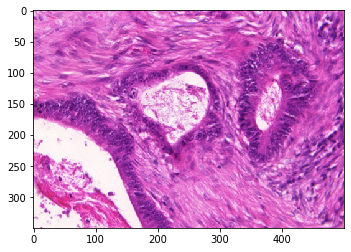

In [18]:
plt.imshow(x_test[0]) 
plt.show()

# Next work
* try to use back and white pictureto do training  directly 
* try to use transfer learning 
* try to use image augmentation to expand pictures

# Thanks for your review and your questions are welcomed!